In [52]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='whitegrid', font_scale=1.5)

In [53]:
two_cat_times = pd.read_csv('two_cat_times.csv')

In [54]:
def make_figure(df):
    df2 = df.set_index(['operation', 'storage']).stack().reset_index().rename(columns={0: 'val'})
    hue_order = ['quantcore.matrix'] + [elt for elt in df['storage'] if elt != 'quantcore.matrix']
    g = sns.FacetGrid(data=df2, col='operation', hue='storage', sharey=False, row='level_2', hue_order=hue_order,
                     palette=['k', 'k', 'k'], aspect=1.2)
    g.map(plt.bar, 'storage', 'val')

    g.axes[0, 0].set_ylabel('Memory')
    g.axes[1, 0].set_ylabel('Time')
    for j, name in enumerate(['Matvec', 'Sandwich', 'Mat-T-Vec']):
        g.axes[0, j].set_title(name)
        g.axes[1, j].set_title('')
        for tick in g.axes[1, j].get_xticklabels():
            tick.set_rotation(60)
        g.axes[1, j].set_xlabel('')
    plt.tight_layout()

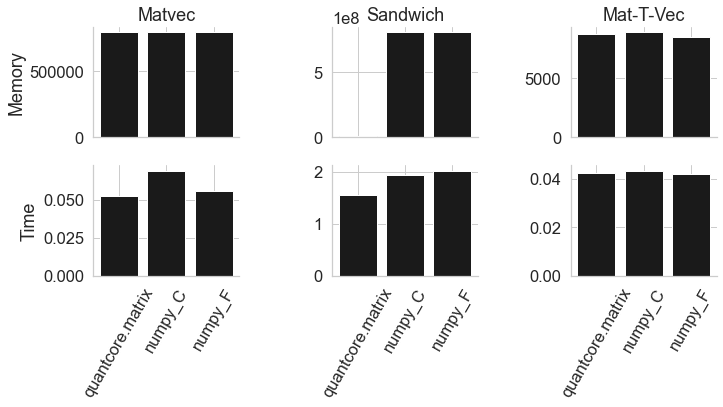

In [55]:
dense_times = pd.read_csv('dense_times.csv')
make_figure(dense_times)
plt.savefig('dense_times.png')

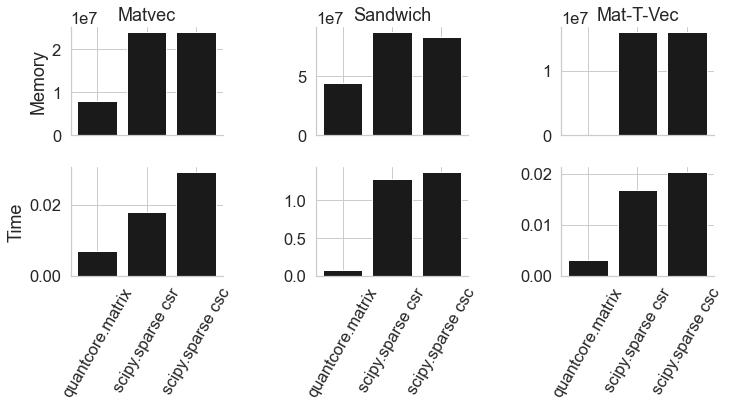

In [56]:
make_figure(two_cat_times)
plt.savefig('two_cat_times.png')

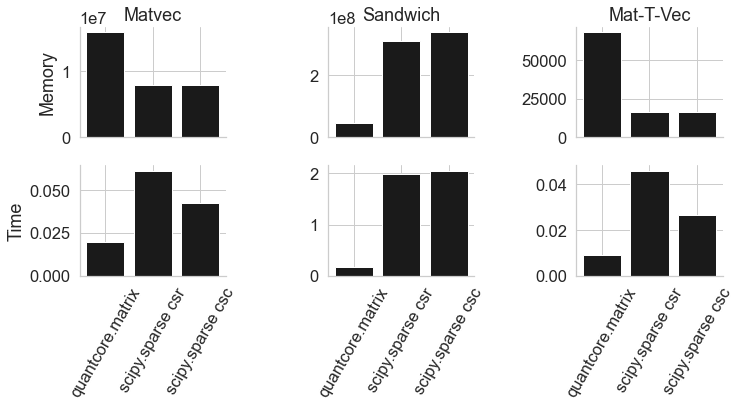

In [57]:
dense_cat_times = pd.read_csv('dense_cat_times.csv')
make_figure(dense_cat_times)
plt.savefig('dense_cat_times.png')